In [1]:
from bs4 import BeautifulSoup
import pandas as pd
pd.set_option('display.max_colwidth', -1)

import re
import requests

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline

# Annual ridership
`http://web.mta.info/nyct/facts/ridership/ridership_sub_annual.htm`

In [30]:
response = requests.get("http://web.mta.info/nyct/facts/ridership/ridership_sub_annual.htm")
doc = BeautifulSoup(response.text)

In [31]:
stations = []
lines = ""
for row in doc.find_all("tr")[4:]:
    station = {}
    total = ""
    try:
        
        station['Station'] = row.find_all("td")[0].text.strip()        
        try: 
            for pic in row.find("td").find("div").find_all("img"):
                one = pic['alt'].split(" ")[0]
                total = one + total
                station['lines'] = total
        except:
            pass

        station['2013'] = row.find_all("td")[1].text
        station['2014'] = row.find_all("td")[2].text
        station['2015'] = row.find_all("td")[3].text
        station['2016'] = row.find_all("td")[4].text
        station['2017'] = row.find_all("td")[5].text
        station['2018'] = row.find_all("td")[6].text.strip()
        station['Rank'] = row.find_all("td")[9].text
        station['Borough'] = row.find_previous("td", colspan="10").text
        stations.append(station)
    except: pass

In [32]:
df = pd.DataFrame(stations, columns=['Station','lines','Borough','Rank','2013','2014','2015','2016','2017','2018'])
df = df.dropna()

In [33]:
df.head()

,Station,lines,Borough,Rank,2013,2014,2015,2016,2017,2018
0,138 St-Grand Concourse,54,The Bronx,365,"957,984","1,033,559","1,056,380","1,070,024","1,036,746","944,598"
1,149 St-Grand Concourse,542,The Bronx,121,"4,427,399","4,536,888","4,424,754","4,381,900","4,255,015","3,972,763"
2,161 St-Yankee Stadium,4DB,The Bronx,38,"8,766,012","8,961,029","8,922,188","8,784,407","8,596,506","8,392,290"
3,167 St,4,The Bronx,165,"3,081,534","3,067,345","3,180,274","3,179,087","2,954,228","2,933,140"
4,167 St,DB,The Bronx,231,"3,091,289","3,245,977","3,295,032","3,365,748","3,293,451","2,022,919"


In [34]:
## Changing the numbers to actual numbers

cols = ['2013', '2014','2015','2016','2017','2018']
df[cols] = df[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='coerce'))
df.Rank = df.Rank.astype(int)

In [35]:
df.head()

,Station,lines,Borough,Rank,2013,2014,2015,2016,2017,2018
0,138 St-Grand Concourse,54,The Bronx,365,957984.0,1033559.0,1056380.0,1070024.0,1036746.0,944598
1,149 St-Grand Concourse,542,The Bronx,121,4427399.0,4536888.0,4424754.0,4381900.0,4255015.0,3972763
2,161 St-Yankee Stadium,4DB,The Bronx,38,8766012.0,8961029.0,8922188.0,8784407.0,8596506.0,8392290
3,167 St,4,The Bronx,165,3081534.0,3067345.0,3180274.0,3179087.0,2954228.0,2933140
4,167 St,DB,The Bronx,231,3091289.0,3245977.0,3295032.0,3365748.0,3293451.0,2022919


In [36]:
df[(df['Borough'] == "Brooklyn") & (df.lines.str.contains("F") == True)]['2013'].sum()

52361989.0

In [38]:
df.head()

,Station,lines,Borough,Rank,2013,2014,2015,2016,2017,2018
0,138 St-Grand Concourse,54,The Bronx,365,957984.0,1033559.0,1056380.0,1070024.0,1036746.0,944598
1,149 St-Grand Concourse,542,The Bronx,121,4427399.0,4536888.0,4424754.0,4381900.0,4255015.0,3972763
2,161 St-Yankee Stadium,4DB,The Bronx,38,8766012.0,8961029.0,8922188.0,8784407.0,8596506.0,8392290
3,167 St,4,The Bronx,165,3081534.0,3067345.0,3180274.0,3179087.0,2954228.0,2933140
4,167 St,DB,The Bronx,231,3091289.0,3245977.0,3295032.0,3365748.0,3293451.0,2022919


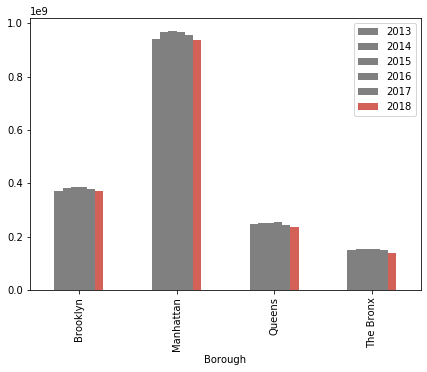

In [55]:
df.groupby('Borough').sum().plot(kind='bar', y=['2013','2014','2015','2016','2017','2018'], color=['gray','gray','gray','gray','gray','#D36157'], figsize=(7, 5))

In [9]:
df.to_csv("station_annual_ridership.csv", index=False)

## Average weekday ridership
`http://web.mta.info/nyct/facts/ridership/ridership_sub.htm`

In [10]:
response = requests.get("http://web.mta.info/nyct/facts/ridership/ridership_sub.htm")
doc = BeautifulSoup(response.text)

In [11]:
stations = []
lines = ""
for row in doc.find_all("tr")[5:]:
    station = {}
    total = ""
    try:
        
        station['Station'] = row.find_all("td")[0].text.strip()        
        try: 
            for pic in row.find("td").find("div").find_all("img"):
                one = pic['alt'].split(" ")[0]
                total = one + total
                station['lines'] = total
        except:
            pass

        station['2013'] = row.find_all("td")[1].text
        station['2014'] = row.find_all("td")[2].text
        station['2015'] = row.find_all("td")[3].text
        station['2016'] = row.find_all("td")[4].text
        station['2017'] = row.find_all("td")[5].text
        station['2018'] = row.find_all("td")[6].text.strip()
        station['Rank'] = row.find_all("td")[9].text
        station['Borough'] = row.find_previous("td", colspan="10").text
        stations.append(station)
    except: pass

In [12]:
df = pd.DataFrame(stations, columns=['Station','lines','Borough','Rank','2013','2014','2015','2016','2017','2018'])
df = df.dropna()

## Changing the numbers to actual numbers
cols = ['2013', '2014','2015','2016','2017','2018']
df[cols] = df[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='coerce'))
df.Rank = df.Rank.astype(int)

In [13]:
df.tail()

,Station,lines,Borough,Rank,2013,2014,2015,2016,2017,2018
417,Sutphin Blvd-Archer Av-JFK Airport,ZJE,Queens,54,23012.0,23747.0,24349.0,24796.0,23843,23388
418,Vernon Blvd-Jackson Av,7,Queens,96,12610.0,14123.0,14819.0,15910.0,15781,15093
419,Woodhaven Blvd,ZJ,Queens,294,4576.0,4796.0,4940.0,4838.0,5104,4771
420,Woodhaven Blvd,RM,Queens,66,22276.0,22156.0,22220.0,22483.0,21879,20704
421,Woodside-61 St,7,Queens,83,16559.0,16807.0,17007.0,17236.0,16945,16501


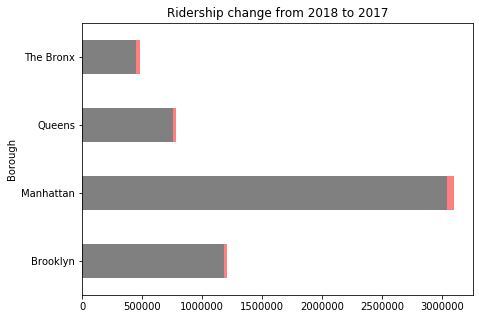

In [17]:
ax = df.groupby(by='Borough')['2017'].sum().plot(kind='barh', alpha=.5, color='red', title='Ridership change from 2018 to 2017', figsize=(7,5))
df.groupby(by='Borough')['2018'].sum().plot(kind='barh', ax=ax, color='gray')

In [18]:
df['change'] = df['2018'] - df['2017']

In [19]:
brooklyn = df[df.Borough == 'Brooklyn']

In [20]:
f = df[(df.lines.str.contains("F")) & (df.Borough == "Brooklyn")]

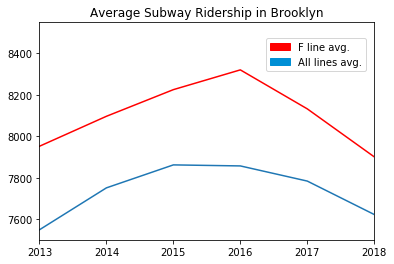

In [21]:
ax = f[cols].mean().plot(title="Average Subway Ridership in Brooklyn", color='red')
brooklyn[cols].mean().plot()

green_color = mpatches.Patch(color='#FF0000', label='F line avg.')
gold_color = mpatches.Patch(color='#008FD5', label='All lines avg.')
ax.set_ylim(7500,8550)


ax.legend(handles=[green_color, gold_color], bbox_to_anchor=(.99, .95))
plt.savefig("C:/Users/sawye/Desktop/reporting/story1/media/ridership.png", bbox_inches='tight')

In [22]:
df.to_csv("station_weekday_ridership.csv", index=False)

## Average Weekend Ridership
`http://web.mta.info/nyct/facts/ridership/ridership_sub_weekend.htm`

In [23]:
response = requests.get("http://web.mta.info/nyct/facts/ridership/ridership_sub_weekend.htm")
doc = BeautifulSoup(response.text)

In [24]:
stations = []
lines = ""
for row in doc.find_all("tr")[5:]:
    station = {}
    total = ""
    try:
        
        station['Station'] = row.find_all("td")[0].text.strip()        
        try: 
            for pic in row.find("td").find("div").find_all("img"):
                one = pic['alt'].split(" ")[0]
                total = one + total
                station['lines'] = total
        except:
            pass

        station['2013'] = row.find_all("td")[1].text
        station['2014'] = row.find_all("td")[2].text
        station['2015'] = row.find_all("td")[3].text
        station['2016'] = row.find_all("td")[4].text
        station['2017'] = row.find_all("td")[5].text
        station['2018'] = row.find_all("td")[6].text.strip()
        station['Rank'] = row.find_all("td")[9].text
        station['Borough'] = row.find_previous("td", colspan="10").text
        stations.append(station)
    except: pass

In [25]:
df = pd.DataFrame(stations, columns=['Station','lines','Borough','Rank','2013','2014','2015','2016','2017','2018'])
df = df.dropna()

## Changing the numbers to actual numbers
cols = ['2013', '2014','2015','2016','2017','2018']
df[cols] = df[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='coerce'))
df.Rank = df.Rank.astype(int)

In [26]:
df.tail()

,Station,lines,Borough,Rank,2013,2014,2015,2016,2017,2018
417,Sutphin Blvd-Archer Av-JFK Airport,ZJE,Queens,52,26184.0,28862.0,28383.0,28587.0,25234,24020
418,Vernon Blvd-Jackson Av,7,Queens,135,9491.0,10347.0,12582.0,14981.0,14901,11858
419,Woodhaven Blvd,ZJ,Queens,354,4255.0,5226.0,5388.0,5099.0,3884,2820
420,Woodhaven Blvd,RM,Queens,54,27194.0,27105.0,26745.0,25550.0,23929,22672
421,Woodside-61 St,7,Queens,73,20432.0,19669.0,20127.0,20360.0,21067,19796


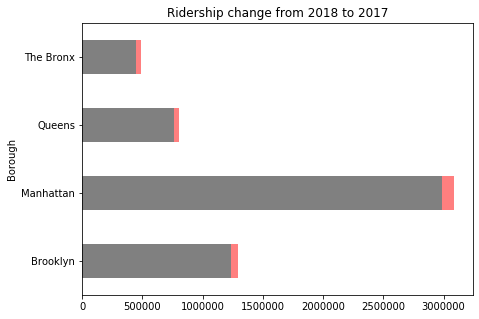

In [27]:
ax = df.groupby(by='Borough')['2017'].sum().plot(kind='barh', alpha=.5, color='red', title='Ridership change from 2018 to 2017', figsize=(7,5))
df.groupby(by='Borough')['2018'].sum().plot(kind='barh', ax=ax, color='gray')

In [20]:
df.to_csv("station_weekend_ridership.csv", index=False)